In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
#salary column has Nan values

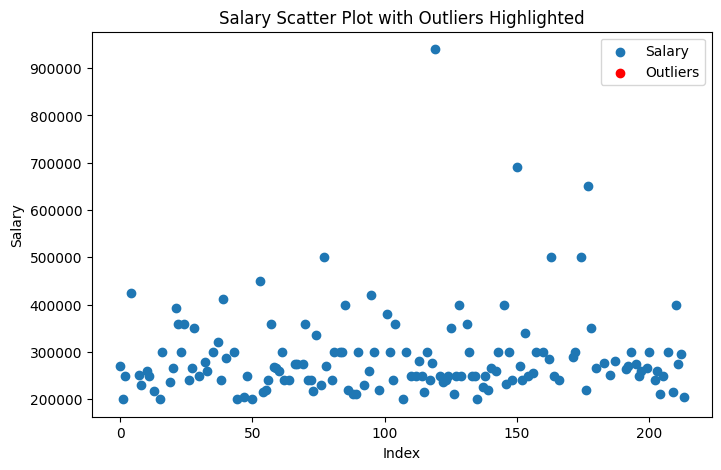

In [5]:
#checking outliers for salary columns
import matplotlib.pyplot as plt
import numpy as np

# Calculate IQR to identify outliers
Q1 = np.percentile(dataset['salary'], 25)
Q3 = np.percentile(dataset['salary'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (dataset['salary'] < lower_bound) | (dataset['salary'] > upper_bound)

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(dataset.index, dataset['salary'], label='Salary')
plt.scatter(dataset.index[outliers], dataset['salary'][outliers], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Salary Scatter Plot with Outliers Highlighted')
plt.legend()
plt.show()


In [6]:
#Replacing NaN with the mean preserves the overall distribution and avoids introducing unrealistic values like zero,especially when no outliers are present
avg_salary=dataset['salary'].mean()
print("The mean salary:",avg_salary)
dataset.fillna({'salary':avg_salary},inplace=True)

The mean salary: 288655.4054054054


In [7]:
dataset['salary']

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

# 2)How many of them are not placed?

In [8]:

not_placed_count=dataset[dataset['status']=='Not Placed'].shape[0]
not_placed_count

67

In [9]:
dataset.drop('sl_no',axis=1,inplace=True)

In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


# Find the reason for non-placement from the dataset?

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


cols = ['status', 'ssc_p', 'hsc_p', 'degree_p']
data = dataset[cols]

#  Calculate average scores for each group
avg_scores = data.groupby('status')[['ssc_p', 'hsc_p', 'degree_p']].mean()
print("Average Academic Scores:")
print(avg_scores)





Average Academic Scores:
                ssc_p      hsc_p   degree_p
status                                     
Not Placed  57.544030  58.395522  61.134179
Placed      71.721486  69.926554  68.740541


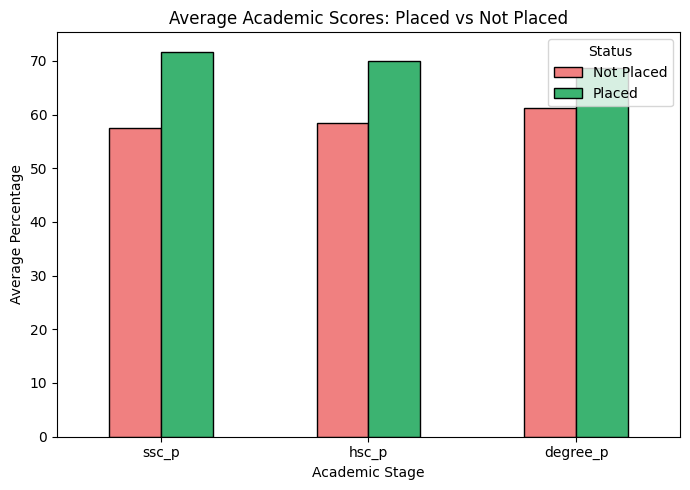

In [22]:
# Step 5. Optional – visualize mean comparison using bar chart
#T=Transpose of avg_scores so that column(ssc,hsc,degree) becomes row(index)-graph x axis alway taken from row
avg_scores.T.plot(kind='bar', figsize=(7,5), color=['lightcoral', 'mediumseagreen'], edgecolor='black')
plt.title('Average Academic Scores: Placed vs Not Placed')
plt.ylabel('Average Percentage')
plt.xlabel('Academic Stage')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


In [ ]:
#above graph implies academic scores impact student placements..more score in ssc_p and hsc_p and degree_p contributes more placements.

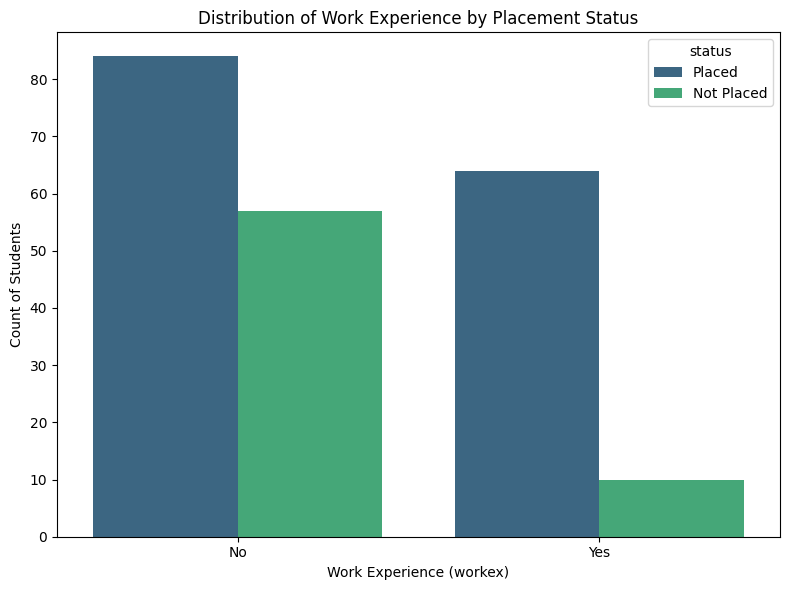

In [23]:
#visualization of impact of Work Experience in  Placement Status
# countplot- is a type of bar chart that shows the counts of observations in each categorical bin.
plt.figure(figsize=(8, 6))
sns.countplot(x='workex', hue='status', data=dataset, palette='viridis')
plt.title('Distribution of Work Experience by Placement Status')
plt.xlabel('Work Experience (workex)')
plt.ylabel('Count of Students')
plt.tight_layout()
plt.show()



In [ ]:
#Impact of Work Experience: Students who have work experience ('Yes') appear to have a higher probability of getting placed compared to those without 
#work experience ('No').

--- Cross-Tabulation: Specialisation vs. Placement Status ---
status          Not Placed  Placed
specialisation                    
Mkt&Fin                 25      95
Mkt&HR                  42      53

--- Cross-Tabulation: Degree Type vs. Placement Status ---
status     Not Placed  Placed
degree_t                     
Comm&Mgmt          43     102
Others              6       5
Sci&Tech           18      41


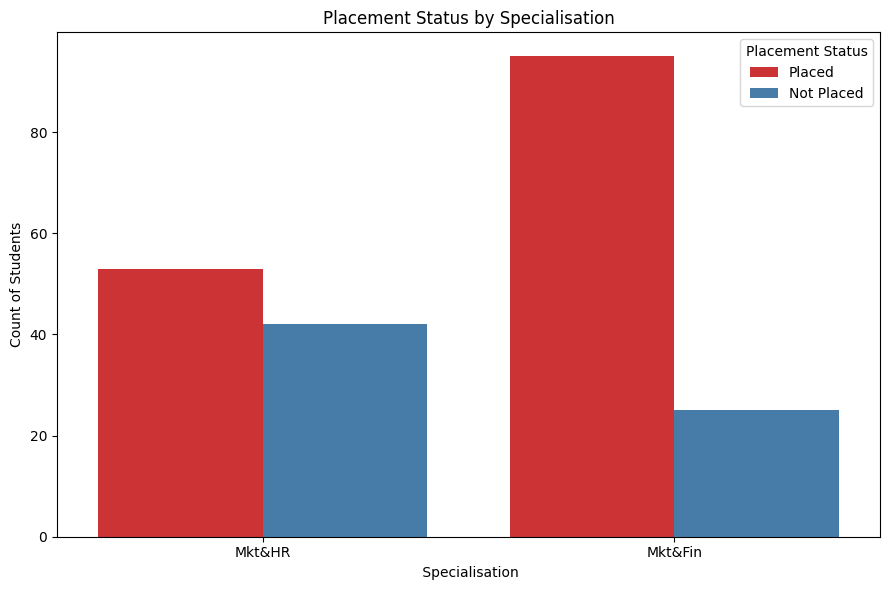

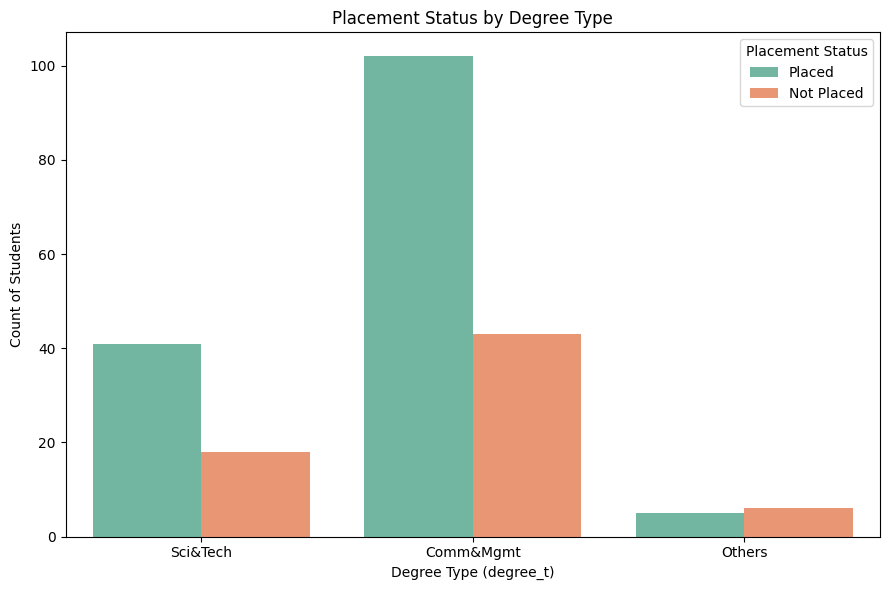

In [24]:
print("---- Specialisation vs. Placement Status ---")

specialisation_status_counts = pd.crosstab(dataset['specialisation'], dataset['status'])
print(specialisation_status_counts)

print("\n---Degree Type vs. Placement Status ---")

degree_status_counts = pd.crosstab(dataset['degree_t'], dataset['status'])
print(degree_status_counts)



# --- Chart 1: Specialisation by Placement Status ---
plt.figure(figsize=(9, 6))
sns.countplot(x='specialisation', hue='status', data=dataset, palette='Set1' )
plt.title('Placement Status by Specialisation')
plt.xlabel(' Specialisation')
plt.ylabel('Count of Students')
plt.legend(title='Placement Status')
plt.tight_layout()
plt.show()

# --- Chart 2: Degree Type by Placement Status ---
plt.figure(figsize=(9, 6))
sns.countplot(x='degree_t', hue='status', data=dataset, palette='Set2')
plt.title('Placement Status by Degree Type')
plt.xlabel('Degree Type (degree_t)')
plt.ylabel('Count of Students')
plt.legend(title='Placement Status')
plt.tight_layout()
plt.show()


In [ ]:
#Above two graphs tells in specialization those who have done Markt&finance got placed more than others also in degree_type students who did 
#comm&mgmt have got placed more than others.

# comparison of E_test and MBA_P score against status

In [25]:
etest_scores = dataset[['etest_p', 'status']]
grouped_stats = etest_scores.groupby('status').agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(grouped_stats)

           etest_p                                         
             count       mean median        std   min   max
status                                                     
Not Placed      67  69.587910   67.0  11.930687  50.0  97.0
Placed         148  73.238041   72.0  13.729333  50.0  98.0


In [ ]:
# Placed students have a slightly higher mean  73.24 compared to Not Placed students 69.59. 
#The standard deviation is also slightly larger for Placed students, indicating a wider spread of scores.

In [26]:
mba_scores = dataset[['mba_p', 'status']]
grouped_stats1 = mba_scores.groupby('status').agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(grouped_stats1)

           mba_p                                           
           count       mean  median       std    min    max
status                                                     
Not Placed    67  61.612836  60.690  5.705689  51.21  75.71
Placed       148  62.579392  62.245  5.884583  52.38  77.89


In [ ]:
#Difference in mean is not that much so MBA percentage  is a less differentiating factor for placement status than the E-Test score.

# Performing T Test for numerical columns.

In [27]:
numerical_columns=dataset.select_dtypes(include=['number'])
numerical_columns=numerical_columns.drop('salary',axis=1)
numerical_columns

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


In [28]:
from scipy import stats
placed=dataset[dataset['status']=='Placed']
not_placed=dataset[dataset['status']=='Not Placed']


In [29]:
result=[]
for col in numerical_columns:    
    ttest,pval=stats.ttest_ind(placed[col],not_placed[col],equal_var=False) #eual_var flase means sample size are unequal or uneven dataspread.
    formatted_p_val = f"{pval:.3f}"
    is_significant='Yes' if(pval<=0.05) else 'No'
    result.append({'variable':col,'Ttest':ttest,'Pval':formatted_p_val,'significance':is_significant})
result_df=pd.DataFrame(result)
print(result_df)

   variable      Ttest   Pval significance
0     ssc_p  11.333162  0.000          Yes
1     hsc_p   8.043664  0.000          Yes
2  degree_p   8.054153  0.000          Yes
3   etest_p   1.980112  0.050          Yes
4     mba_p   1.139201  0.257           No


In [ ]:
#as per above table mba_p is less significant factor for placement status because pval > 0.05

# 4)What kind of relation between salary and mba_p?

In [30]:
#Filter the dataset to include only placed students, as only they have a salary value
placed_data = dataset[dataset['status'] == 'Placed']
correlation = placed_data['salary'].corr(placed_data['mba_p'])

print(f"Correlation between Salary and MBA Percentage (Placed Students Only):::{correlation:.3f}")


Correlation between Salary and MBA Percentage (Placed Students Only):::0.175


In [ ]:
#this correlation value means very neglibile and weak relationship between them.

# 5)Which specialization is getting minimum salary?

In [35]:
#select only placed students because they only have salary
placed_df=dataset[dataset['status']=='Placed']
grouped_data=placed_df.groupby('specialisation')['salary'].mean()
min_salary=grouped_data.min()
min_salary_special=grouped_data.idxmin()
print(f"The minimum salary is ${min_salary:.3f}")
print("The specialization getting minimum salary is",min_salary_special)


The minimum salary is $270377.358
The specialization getting minimum salary is Mkt&HR


# 6)How many of them getting above 500000 salaries?

In [36]:
count_=placed_df[placed_df['salary']>500000].shape[0]
print("Number of students getting salary above 500000 are:",count_)

Number of students getting salary above 500000 are: 3


# 7)Testing variance between etest_p and mba_p 

In [38]:
#comparing the means of only two variables (which are measured on the same students) is  a Paired Samples t-test.
from scipy import stats
etest_scores = dataset['etest_p']
mba_scores = dataset['mba_p']
ttest_val, p_value = stats.ttest_ind(etest_scores, mba_scores)
p_value_formatted = f"{p_value:.4f}"
print(f"Ttest value:{ttest_val:.4f}")
print("P value:",p_value_formatted)

Ttest value:9.9320
P value: 0.0000


In [39]:
threshold=0.05
if p_value < threshold:
    print("RejectNUll hypothesis so,there is significant difference between the mean E-Test scores and the mean MBA scores of the students. ")
else:
    print("Null Hypothesis-There is no significant difference between them")

RejectNUll hypothesis so,there is significant difference between the mean E-Test scores and the mean MBA scores of the students. 


# 8)Test the similarity between the degree_t (Sci&Tech) and specialisation (Mkt&HR) with respect to salary  at significance level of 5%.


In [40]:

# 1. Filter the data to include only placed students
placed_df = dataset[dataset['status'] == 'Placed']

# 2. Define the two salary samples
# Group 1: Salary of placed students with 'Sci&Tech' degree type
salary_sci_tech = placed_df[placed_df['degree_t'] == 'Sci&Tech']['salary']

# Group 2: Salary of placed students with 'Mkt&HR' specialization
salary_mkt_hr = placed_df[placed_df['specialisation'] == 'Mkt&HR']['salary']

# Check sample sizes 
n1 = len(salary_sci_tech)
n2 = len(salary_mkt_hr)

# 3. Perform the Independent Samples t-test 
t_statistic, p_value = stats.ttest_ind(
    salary_sci_tech,
    salary_mkt_hr,
    equal_var=False
)

# Convert the p-value to a clean format
p_value_formatted = f"{p_value:.4f}"


# Decision Rule
if p_value < 0.05:
    decision = "Reject the Null Hypothesis"
    conclusion = "There is a  significant difference in mean salary."
else:
    decision = "Accept the Null Hypothesis"
    conclusion = "There is no  significant difference in mean salary"

print(f"Group 1 (Sci&Tech Degree) Mean Salary: {salary_sci_tech.mean():.2f} (n={n1})")
print(f"Group 2 (Mkt&HR Specialisation) Mean Salary: {salary_mkt_hr.mean():.2f} (n={n2})")
print(f"T-Statistic: {t_statistic:.3f}") #t value > 2 or 3 means larger difference in mean
print(f"P-Value: {p_value_formatted}")
print(f"\nDecision: {decision}")
print(f"Conclusion: {conclusion}")

Group 1 (Sci&Tech Degree) Mean Salary: 314609.76 (n=41)
Group 2 (Mkt&HR Specialisation) Mean Salary: 270377.36 (n=53)
T-Statistic: 2.550
P-Value: 0.0134

Decision: Reject the Null Hypothesis
Conclusion: There is a statistically significant difference in mean salary.


# 9)Convert the normal distribution to standard normal distribution for salary column

In [41]:
#standardization invloves converting each salary value using z -score=x-mean/std
#SND means mean=0,std=1
mean_salary=placed_df['salary'].mean()
std_salary=placed_df['salary'].std()
z_score=(placed_df['salary']-mean_salary)/std_salary
placed_df['salary_zscore']=z_score
print(placed_df[['salary', 'salary_zscore']].head())

     salary  salary_zscore
0  270000.0      -0.199614
1  200000.0      -0.948618
2  250000.0      -0.413615
4  425000.0       1.458895
7  252000.0      -0.392215


C:\Users\huawei\AppData\Local\Temp\ipykernel_16848\4244515218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed_df['salary_zscore']=z_score


In [42]:
#checking SND
new_mean=placed_df['salary_zscore'].mean()
print(f"newmean{new_mean:.4f}")
new_std=placed_df['salary_zscore'].std()
print(f"newmean{new_std:.4f}")

newmean0.0000
newmean1.0000


# 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [45]:

def pdf_calc(data,first,end):
    import seaborn as sns
    from matplotlib import pyplot
    from scipy.stats import norm
    import numpy as np
    ax=sns.displot(data,kde=True,line_kws={'color':'red'},color='purple')
    pyplot.axvline(first,color='green')
    pyplot.axvline(end,color='green')
    pyplot.tight_layout()
    mn=data.mean()
    sd=data.std()
    dist=norm(mn,sd)
    probabilities=list(map(lambda v:dist.pdf(v),range(first,end)))
    total_pdf=sum(probabilities)
    return total_pdf

Total PDF from  700000 to 900000 is: 0.0000


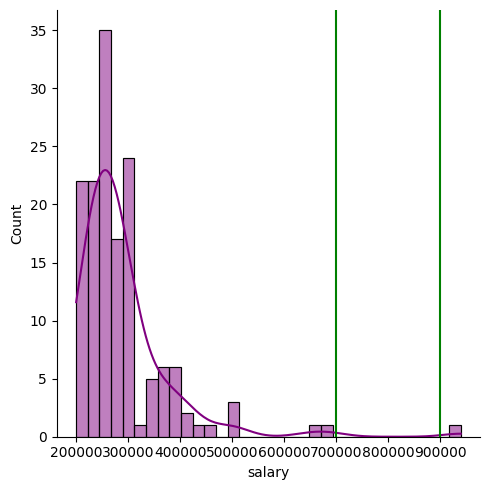

In [46]:
final_pdf=pdf_calc(placed_df["salary"],700000,900000)
print(f"Total PDF from  700000 to 900000 is: {final_pdf:.4f}")

# 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.

In [47]:

#since two groups come from same set of degree ,perform paired sample t-test.
from scipy import stats
sci_tech_student=dataset[dataset['degree_t']=='Sci&Tech']
etest_score=sci_tech_student['etest_p']
mba_score=sci_tech_student['mba_p']
ttestval,pval=stats.ttest_rel(etest_score,mba_score)
pval_formated=f"{pval:.4f}"

if pval<0.05:
    decision="Reject null hypothesis"
    conclusion="There is significant difference in the scores of etest and mba"
else:
    decision="Accept null hypothesis"
    conclusion="There is no significant difference in the scores of etest and mba"

print("P value is:",pval_formated)
print("Ttest value:",ttestval)
print("Final decision>>>>",decision)
print("Final conclusion>>>>",conclusion)

P value is: 0.0000
Ttest value: 5.0049844583693615
Final decision>>>> Reject null hypothesis
Final conclusion>>>> There is significant difference in the scores of etest and mba


# 12)Which parameter is highly correlated with salary?

In [48]:
#num_cols=dataset.select_dtypes(include=['number']).columns
subset_df = placed_df[['salary', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
correlation_matrix = subset_df.corr()
print(correlation_matrix)
salary_correlations = correlation_matrix['salary'].drop('salary')
print("\n\n",salary_correlations)
highest_corr_variable=salary_correlations.idxmax()
highest_corr_value = salary_correlations[highest_corr_variable]
print(f"The highest correlation value is:{highest_corr_value:.4f}")
print("The highest correlating factor is:",highest_corr_variable)

            salary     ssc_p     hsc_p  degree_p   etest_p     mba_p
salary    1.000000  0.035330  0.076819 -0.019272  0.178307  0.175013
ssc_p     0.035330  1.000000  0.293416  0.380657  0.317892  0.430560
hsc_p     0.076819  0.293416  1.000000  0.221307  0.284672  0.329983
degree_p -0.019272  0.380657  0.221307  1.000000  0.217683  0.494093
etest_p   0.178307  0.317892  0.284672  0.217683  1.000000  0.284143
mba_p     0.175013  0.430560  0.329983  0.494093  0.284143  1.000000


 ssc_p       0.035330
hsc_p       0.076819
degree_p   -0.019272
etest_p     0.178307
mba_p       0.175013
Name: salary, dtype: float64
The highest correlation value is:0.1783
The highest correlating factor is: etest_p


# 13)Correlation graph

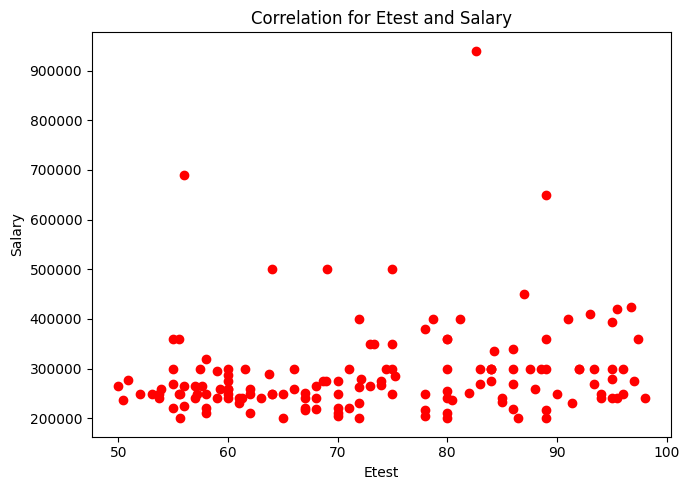

In [49]:
#Plotting graph
plt.figure(figsize=(7, 5))
plt.scatter(placed_df['etest_p'], placed_df['salary'],color='red')
plt.xlabel('Etest')
plt.ylabel('Salary')
plt.title('Correlation for Etest and Salary')
plt.tight_layout()
plt.show()